
# Exploratory Data Analysis


## import libraries and data

In [0]:
import pyspark
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [0]:
CATALOG = "workspace"
SCHEMA = "safe_driver_prediction"

train_df = spark.read.table(f"{CATALOG}.{SCHEMA}.train")
test_df = spark.read.table(f"{CATALOG}.{SCHEMA}.test")

print(f"train set has {train_df.count()} rows and {len(train_df.columns)} columns.")
print(f"test set has {test_df.count()} rows and {len(test_df.columns)} columns.")

train set has 595212 rows and 59 columns.
test set has 892816 rows and 58 columns.


In [0]:
train_df.limit(10).display()


id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
863026,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,-1.0,6,1,-1,0,1,15,1,1,0,1,5,2,0.44721359549999995,1.1285549892,0.4,3.4641016150999997,0.2,0.4,0.0,2,2,8,3,11,3,11,7,2,2,11,0,1,1,0,0,0
863030,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,8,0,1,0,0.7,0.9,1.9031224343000002,11,1,-1,0,-1,0,1,1,1,1,78,3,0.4,0.7979959403,0.38483762810000005,3.3166247904,0.4,0.3,0.8,2,4,8,4,8,2,9,6,1,2,5,0,1,0,0,1,0
863031,0,0,1,7,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.3,0.2,-1.0,5,1,0,0,0,0,1,1,2,1,95,2,0.399374511,0.6440605947,0.3322649545,2.0,0.1,0.0,0.0,2,2,8,4,10,4,7,2,3,2,10,1,1,0,0,0,0
863033,0,1,3,8,1,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0.9,1.2,0.6025985397,11,0,1,0,1,7,1,1,2,1,79,3,0.4,1.0048230797,0.3466987165,3.6055512755000003,0.6,0.6,0.0,0,1,8,4,10,3,9,2,4,3,10,0,0,1,1,0,0
863034,0,5,2,1,1,0,0,0,1,0,0,0,0,0,0,6,0,1,0,0.9,1.2,1.6678953803999998,11,1,0,0,1,1,1,1,2,1,70,3,0.3741657387,0.7491041481999999,0.33911649920000003,3.0,0.5,0.3,0.4,2,2,8,3,10,4,8,5,2,2,6,0,1,1,0,0,0
863036,0,7,1,3,1,0,0,0,0,1,0,0,0,0,0,7,1,0,0,0.9,0.5,0.9093266740000001,6,1,-1,0,1,1,1,1,0,1,64,1,0.316227766,0.6621246793,0.3701351105,2.8284271247,0.2,0.2,0.3,4,2,7,2,10,1,11,3,0,0,5,0,0,0,0,0,0
863039,0,0,2,6,1,0,0,1,0,0,0,0,0,0,0,5,1,0,0,0.1,0.1,-1.0,7,1,-1,0,-1,1,1,1,2,1,25,3,0.3741657387,0.7942848543000001,-1.0,3.6055512755000003,0.5,0.9,0.2,3,3,8,3,7,5,14,4,2,0,9,0,1,0,1,1,0
863040,0,1,3,6,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0.5,0.2,0.6694213918999999,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316227766,0.7445775051000001,0.36851051549999997,3.4641016150999997,0.4,0.8,0.9,3,4,8,2,9,1,10,3,3,3,3,0,1,0,0,0,0
863043,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.4,0.0,0.5273755777,11,0,1,9,1,2,-1,0,1,1,104,3,0.44721359549999995,1.6885614200999999,0.4669047012,3.7416573868,0.1,0.5,0.1,0,0,8,3,11,2,8,1,0,1,14,0,1,1,0,1,1
863044,0,0,1,5,0,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.3,0.2,-1.0,10,1,-1,0,1,11,1,1,0,1,103,1,0.316227766,0.5818892002,0.3583294573,2.8284271247,0.0,0.2,0.1,1,3,8,3,8,4,9,6,1,2,11,0,1,0,0,0,0



## check different feature types

In [0]:
train_df = train_df.toPandas()
test_df = test_df.toPandas()

In [0]:
train_df.columns = train_df.columns.str.replace('ps_', '', regex=False)
test_df.columns = test_df.columns.str.replace('ps_', '', regex=False)

In [0]:

columns = train_df.columns

print("categorical features: \n", [col for col in columns if "_cat" in col])
print("--------------------------------------")
print("binary features: \n", [col for col in columns if "_bin" in col])

print("--------------------------------------")
print("--------------------------------------")

print("vehicle features: \n", [col for col in columns if "car_" in col])
print("--------------------------------------")
print("indicator features: \n", [col for col in columns if "ind_" in col])
print("--------------------------------------")
print("regular features: \n", [col for col in columns if "reg_" in col])
print("--------------------------------------")
print("calculated features: \n", [col for col in columns if "calc_" in col])
print("--------------------------------------")

categorical features: 
 ['ind_02_cat', 'ind_04_cat', 'ind_05_cat', 'car_01_cat', 'car_02_cat', 'car_03_cat', 'car_04_cat', 'car_05_cat', 'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat', 'car_11_cat']
--------------------------------------
binary features: 
 ['ind_06_bin', 'ind_07_bin', 'ind_08_bin', 'ind_09_bin', 'ind_10_bin', 'ind_11_bin', 'ind_12_bin', 'ind_13_bin', 'ind_16_bin', 'ind_17_bin', 'ind_18_bin', 'calc_15_bin', 'calc_16_bin', 'calc_17_bin', 'calc_18_bin', 'calc_19_bin', 'calc_20_bin']
--------------------------------------
--------------------------------------
vehicle features: 
 ['car_01_cat', 'car_02_cat', 'car_03_cat', 'car_04_cat', 'car_05_cat', 'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat', 'car_11_cat', 'car_11', 'car_12', 'car_13', 'car_14', 'car_15']
--------------------------------------
indicator features: 
 ['ind_01', 'ind_02_cat', 'ind_03', 'ind_04_cat', 'ind_05_cat', 'ind_06_bin', 'ind_07_bin', 'ind_08_bin', 'ind_09


## plot distributions

In [0]:
def plot_counts_per_feature(dataset: pd.DataFrame, feature_name: str):
    """
    Plot the counts of unique values in a given feature.
    """
    plt.figure(figsize=(6,4))
    sns.countplot(
        x=feature_name, data=dataset, 
        palette='pastel', hue=feature_name, legend=False
    )
    plt.title(f'counts of unique values in "{feature_name}" column')
    plt.xlabel(feature_name)
    plt.ylabel('counts')
    plt.show()

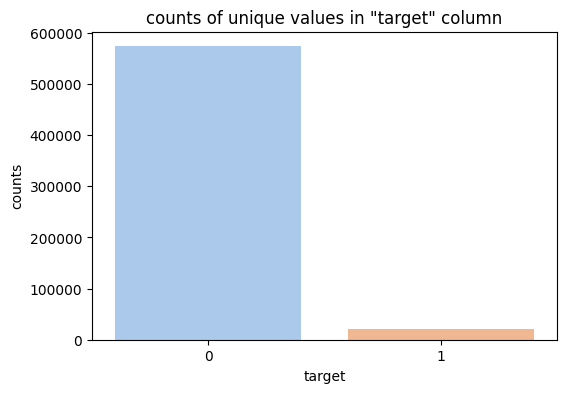

In [0]:
plot_counts_per_feature(
  dataset=train_df, 
  feature_name="target"
)

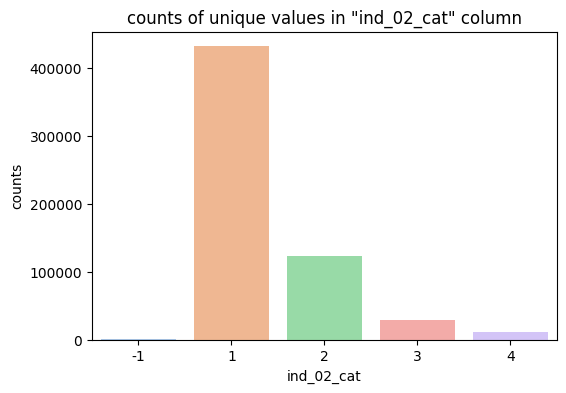

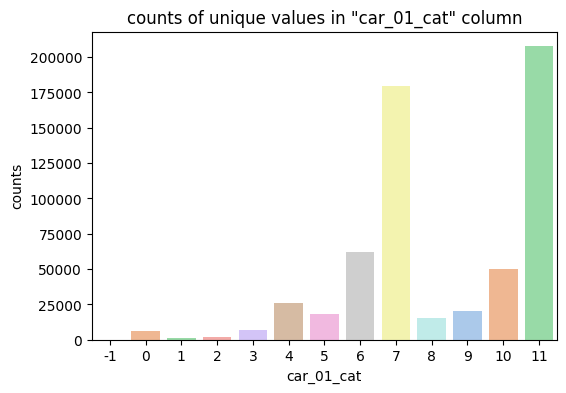

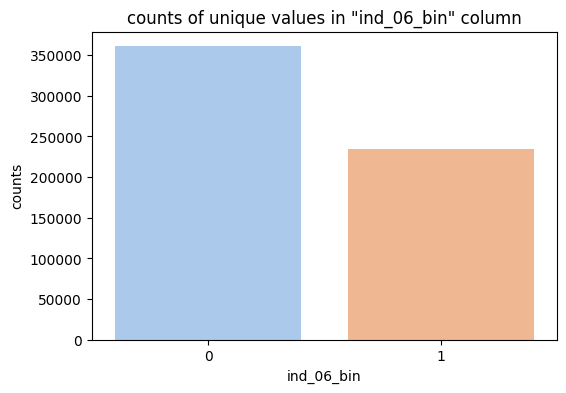

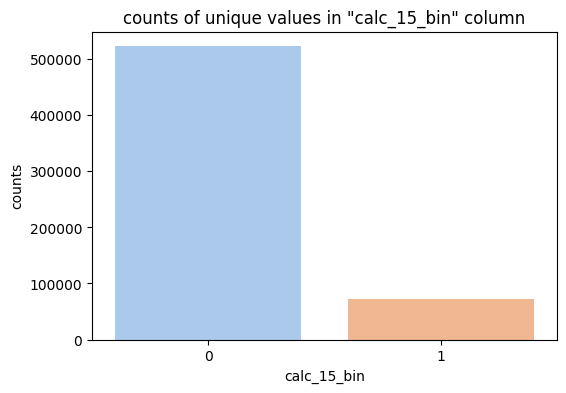

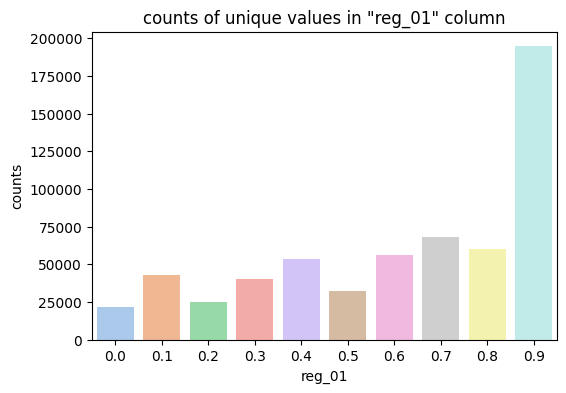

In [0]:
plot_counts_per_feature(
    dataset=train_df,
    feature_name="ind_02_cat"  # a categorical indicator feature
)

plot_counts_per_feature(
    dataset=train_df,
    feature_name="car_01_cat"  # a categorical vehicle feature
)

plot_counts_per_feature(
    dataset=train_df,
    feature_name="ind_06_bin"  # a binary indicator feature
)

plot_counts_per_feature(
    dataset=train_df,
    feature_name="calc_15_bin"  # a binary calculated feature
)

plot_counts_per_feature(
    dataset=train_df,
    feature_name="reg_01"  # a regular feature
)


## plot correlation map

In [0]:
corr_matrix = train_df.corr(method='spearman')  # set to spearman to catch subtle correlations

fig = px.imshow(
  img=corr_matrix,
  color_continuous_scale='RdBu_r',
  zmin=-1, zmax=1,
  labels=dict(x='Features', y='Features', color='Correlation'), 
  x=corr_matrix.columns, 
  y=corr_matrix.columns,
  text_auto=True
)

fig.update_layout(width=1000, height=1000, title="Interactive Correlation Heatmap")
fig.show()